# Ames housing: ridge regression with sklearn

Contents
 - load data
 - data manipulation
   - variables to use
   - dealing with categorical variables
   - train - val - test split
 - multiple regression (with sklearn)
   - fit model
   - predictions
   - performance
   - coefficients

Sources:
http://ww2.amstat.org/publications/jse/v19n3/decock.pdf

Copyright (C) 2018 Alan Chalk  
Please do not distribute or publish without permission.

## Start_.

**packages**

In [1]:
import os
import numpy as np
import pandas as pd
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

import matplotlib.pyplot as plt
%matplotlib inline

**directories and paths**

In [2]:
# Set directories
print(os.getcwd())
dirRawData = "../input/"
dirPData   = "../PData/"

/Users/axc/Dropbox/AML/2020/Projects/AmesHousing/PCode


**Functions**

In [3]:
def fn_MAE(actuals, predictions):
    return np.round(np.mean(np.abs(predictions - actuals)))

def fn_RMSE(actuals, predictions):
    return np.round(np.sqrt(np.mean((predictions - actuals)**2)))

**Load data**

In [4]:
# load df_all
#df_all = pd.read_hdf(dirPData + '02_df_all.h5', 'df_all_onehot')

# load the dict_ that was saved to pickle
f_name = dirPData + '02_df.pickle'
with open(f_name, "rb") as f:
    dict_ = pickle.load(f)
    
df_all_onehot = dict_['df_all_onehot']

del f_name, dict_

df_all = df_all_onehot
del df_all_onehot

In [5]:
# load the dict_ that was saved to pickle
#dict_ = {'vars_ind': vars_ind, 'idx_design': idx_design, 'idx_test': idx_test}
f_name = dirPData + '02_vars.pickle'
with open(f_name, "rb") as f:
    dict_ = pickle.load(f)
    
var_dep = dict_['var_dep']
vars_ind_numeric = dict_['vars_ind_numeric']
vars_ind_categorical = dict_['vars_ind_categorical']
vars_ind_onehot = dict_['vars_ind_onehot']

del f_name, dict_

In [6]:
print('There are {} numeric variables'.format(len(vars_ind_numeric)))
print('There are {} "one hot" variables'.format(len(vars_ind_onehot)))

There are 32 numeric variables
There are 184 "one hot" variables


In [7]:
idx_train  = np.where(df_all['fold'].isin(np.arange(0,6)))[0]
idx_val    = np.where(df_all['fold'].isin([6,7]))[0]
idx_design = np.where(df_all['fold'].isin(np.arange(0,8)))[0]
idx_test   = np.where(df_all['fold'].isin([8,9]))[0]

In [8]:
vars_ind = vars_ind_numeric + vars_ind_onehot

In [9]:
X = df_all[vars_ind].values
y = df_all[var_dep].values

In [10]:
standardScaler_ = StandardScaler()
standardScaler_.fit(X)

X = standardScaler_.transform(X)

### Ridge regression

We are going to fit 20 models - for different values of lambda.  For each penalised model we fit, we will calculate and store the Mean Absolute (prediction) Error on the train and validation data.  And likewise for the Root Mean Square (prediction) Error (RMSE).


**TODO**

Create a list of 20 lambdas $2^0, 2^1, \dots 2^{19}$. Call it lambdas.

Create a DataFrame (called df_results) with 5 columns:
 - lambda_: should contain the values in lambdas
 - MAE_train: fill with np.nan
 - MAE_val: fill with np.nan
 - RMSE_train: fill with np.nan
 - RMSE_val: fill with np.nan


In [11]:
lambdas = [2.**num for num in range(20)]
df_results = pd.DataFrame({'lambda_': lambdas,
                          'MAE_train': np.nan,
                          'MAE_val': np.nan,
                          'RMSE_train': np.nan,
                          'RMSE_val': np.nan
                          })

In [12]:
df_results

,lambda_,MAE_train,MAE_val,RMSE_train,RMSE_val
0,1.0,NaN,NaN,NaN,NaN
1,2.0,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN
3,8.0,NaN,NaN,NaN,NaN
4,16.0,NaN,NaN,NaN,NaN
5,32.0,NaN,NaN,NaN,NaN
6,64.0,NaN,NaN,NaN,NaN
7,128.0,NaN,NaN,NaN,NaN
8,256.0,NaN,NaN,NaN,NaN
9,512.0,NaN,NaN,NaN,NaN


The for loop below will fit a model for each value of lambda and then calculate train and val errors.

**TODO**

Complete the code in the for loop below.
 - 
 - fit the model to X[idx_train, :] and y[idx_train]
 - predict the model on train and val to get model_pred_train/val

In [13]:
for idx, lambda_ in enumerate(lambdas):
    
    # instantiate a model of the Ridge class with alpha equal to the lambda_,
    # fit_intercept=True and normalize=False
    model = Ridge(alpha=lambda_,
                  fit_intercept=True, 
                  normalize=False
                  )
    
    # Fit the model using only the train data (X[idx_train, :], y[idx_train])
    model.fit(X[idx_train, :], y[idx_train])

    # Predict the model separately on the train data and on the val data
    model_pred_train = model.predict(X[idx_train, :])
    model_pred_val = model.predict(X[idx_val, :])

    # Calculate MAE and RMSE on train and val and store in the appropriate column of df_results
    df_results['MAE_train'][idx] = fn_MAE(y[idx_train], model_pred_train)
    df_results['MAE_val'][idx] = fn_MAE(y[idx_val], model_pred_val)

    df_results['RMSE_train'][idx] = fn_RMSE(y[idx_train], model_pred_train)
    df_results['RMSE_val'][idx] = fn_RMSE(y[idx_val], model_pred_val)


In [14]:
df_results.tail()

,lambda_,MAE_train,MAE_val,RMSE_train,RMSE_val
15,32768.0,37854.0,37922.0,54606.0,53370.0
16,65536.0,45220.0,45127.0,63704.0,62368.0
17,131072.0,50640.0,50458.0,70341.0,68965.0
18,262144.0,54061.0,53802.0,74485.0,73094.0
19,524288.0,56008.0,55695.0,76826.0,75429.0


## Train and validation curves

Run the code below to create train and validation curves. Note that we have plotted -lambdas so that the large values are on the left.  Note how the largest values (very simple models) have a high RMSE.  As we increase complexity, the loss reduces (i.e. performance improves) on both the train and validation data.  However there comes a point where train loss continues to improve but val loss does not.

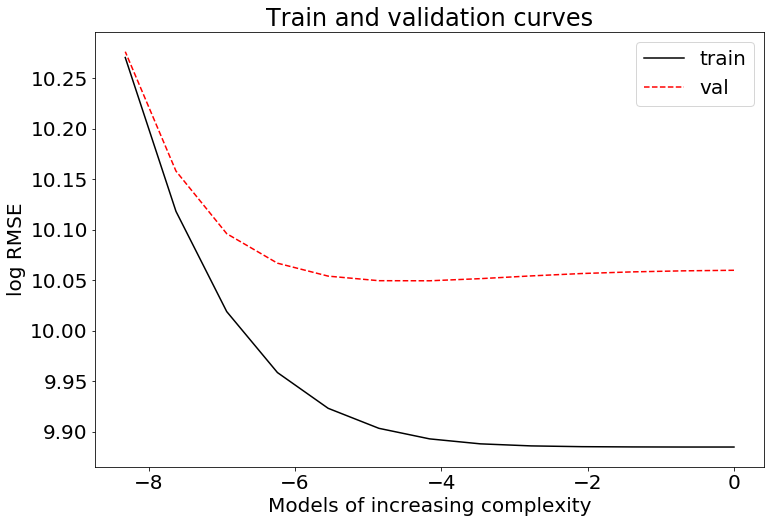

In [15]:
m_log_lambdas = -np.log(df_results['lambda_'])

font = {'size': 20}
plt.rc('font', **font)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(m_log_lambdas[0:13], np.log(df_results['RMSE_train'][0:13]), 'k-', label='train')
ax1.plot(m_log_lambdas[0:13], np.log(df_results['RMSE_val'][0:13]), 'r--', label='val')

ax1.set_xlabel('Models of increasing complexity')
ax1.set_ylabel('log RMSE')
ax1.set_title('Train and validation curves')
_ = ax1.legend()

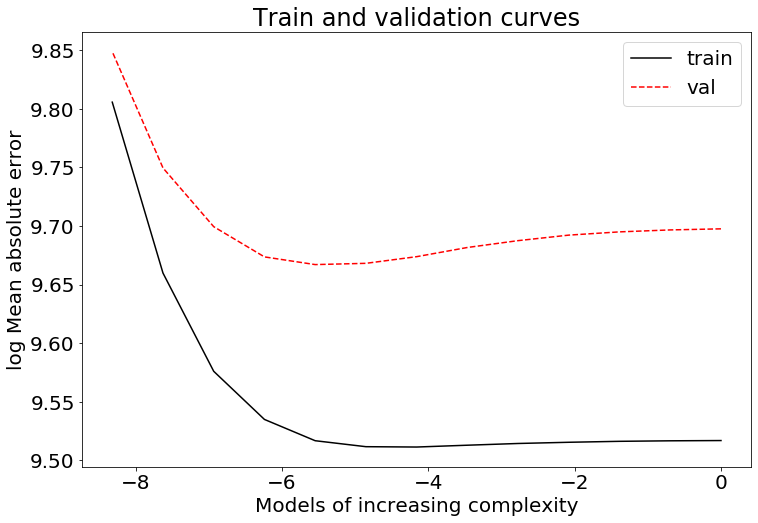

In [16]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(m_log_lambdas[0:13], np.log(df_results['MAE_train'][0:13]), 'k-', label='train')
ax1.plot(m_log_lambdas[0:13], np.log(df_results['MAE_val'][0:13]), 'r--', label='val')

ax1.set_xlabel('Models of increasing complexity')
ax1.set_ylabel('log Mean absolute error')
ax1.set_title('Train and validation curves')
_ = ax1.legend()

**TODO**

Consider the train-val curves above:
 - Do the models on the left suffer from bias? variance?
 - How about those on the right?
 - Does the model chosen by the optimal point on the validation curve suffer from bias? variance?

**Find best lambda and fit all design data**

**TODO**

 - Find the value of lambda which gives the best validation MAE.
 - Instantiate a Ridge model with this value of lambda
 - Fit the model to ALL of the train and validation data (we have called this "design" data)
 - Create predictions for train, val and test data
 - Find the train, val and test MAE

In [17]:
idx = np.argmin(df_results['MAE_val'].values)
best_lambda = df_results['lambda_'].iloc[idx]

model = Ridge(alpha=best_lambda,
              fit_intercept=True, 
              normalize=False)
    
model.fit(X=X[idx_design, :], y=y[idx_design])
    
model_pred_train = model.predict(X[idx_train, :])
model_pred_val   = model.predict(X[idx_val, :])
model_pred_design   = model.predict(X[idx_design, :])
model_pred_test  = model.predict(X[idx_test, :])
    
print('train error', fn_MAE(y[idx_train], model_pred_train))
print('val error',   fn_MAE(y[idx_val], model_pred_val))
print('design error', fn_MAE(y[idx_design], model_pred_design))
print('test error',  fn_MAE(y[idx_test], model_pred_test))



train error 13735.0
val error 14297.0
design error 13884.0
test error 14018.0


- How does the test error compare to non-regularised regression
